In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
from shapely.geometry import shape

In [3]:
# 1. Persiapan Data
gdf = gpd.read_file(r"C:\Users\HP ELITEBOOK\Documents\pythongis\demografi_kota_surabaya.geojson")

# tampilkan 7 baris awal
display(gdf.head(7))

,fid,ID_PROV,PROVINSI,ID_KABKOT,KABKOT,ID_KEC,KECAMATAN,ID_DESA,DESA,JUMLAH PENDUDUK,...,MENGURUS RUMAH TANGGA,PERDAGANGAN,PERAWAT,NELAYAN,PELAJAR DAN MAHASISWA,GURU,WIRASWASTA,PENGACARA,PEKERJAAN LAINNYA,geometry
0,81107,35,JAWA TIMUR,35.78,KOTA SURABAYA,35.78.19,BENOWO,35.78.19.1005,ROMOKALISARI,3299,...,530,9,2,1,573,30,159,0,0,"MULTIPOLYGON Z (((112.65612 -7.19378 0, 112.65..."
1,80983,35,JAWA TIMUR,35.78,KOTA SURABAYA,35.78.05,TEGALSARI,35.78.05.1005,WONOREJO,26156,...,5040,52,10,0,6481,117,860,2,0,"MULTIPOLYGON Z (((112.73505 -7.26808 0, 112.73..."
2,80982,35,JAWA TIMUR,35.78,KOTA SURABAYA,35.78.03,RUNGKUT,35.78.03.1005,WONOREJO,20255,...,2735,15,30,5,5103,174,1212,3,0,"MULTIPOLYGON Z (((112.84346 -7.30556 0, 112.84..."
3,80966,35,JAWA TIMUR,35.78,KOTA SURABAYA,35.78.16,SEMAMPIR,35.78.16.1003,WONOKUSUMO,68777,...,13898,29,36,1,13991,335,4155,2,0,"MULTIPOLYGON Z (((112.76093 -7.21297 0, 112.76..."
4,80961,35,JAWA TIMUR,35.78,KOTA SURABAYA,35.78.04,WONOKROMO,35.78.04.1001,WONOKROMO,39613,...,5925,37,39,3,8808,415,2282,1,0,"MULTIPOLYGON Z (((112.73743 -7.29975 0, 112.73..."
5,80917,35,JAWA TIMUR,35.78,KOTA SURABAYA,35.78.20,WIYUNG,35.78.20.1001,WIYUNG,19293,...,3177,3,33,0,3694,175,686,3,0,"MULTIPOLYGON Z (((112.69749 -7.30169 0, 112.69..."
6,80823,35,JAWA TIMUR,35.78,KOTA SURABAYA,35.78.01,KARANG PILANG,35.78.01.1004,WARU GUNUNG,10049,...,1825,4,13,0,1748,72,416,0,0,"MULTIPOLYGON Z (((112.66354 -7.32963 0, 112.66..."


In [4]:
# cek null
print("\nNull counts per column:")
print(gdf.isnull().sum())


Null counts per column:
fid                  0
ID_PROV              0
PROVINSI             0
ID_KABKOT            0
KABKOT               0
                    ..
GURU                 0
WIRASWASTA           0
PENGACARA            0
PEKERJAAN LAINNYA    0
geometry             0
Length: 103, dtype: int64


In [5]:
# 2. Analisis Statistik Dasar
cols = ['JUMLAH PENDUDUK','KEPADATAN PENDUDUK','JUMLAH KK','JUMLAH WAJIB KTP']
print("\nStatistik Deskriptif:")
display(gdf[cols].describe())


Statistik Deskriptif:


,JUMLAH PENDUDUK,KEPADATAN PENDUDUK,JUMLAH KK,JUMLAH WAJIB KTP
count,154.000000,154.000000,154.000000,154.000000
mean,19347.266234,57.594005,6436.785714,14445.435065
std,11772.577708,35.045256,3790.130684,8597.101428
min,0.000000,0.000000,0.000000,0.000000
25%,11872.500000,35.342710,3903.750000,8851.750000
50%,15991.000000,47.602888,5443.500000,12176.500000
75%,23063.000000,68.655206,7771.500000,17408.750000
max,68777.000000,204.739153,21647.000000,48684.000000


In [6]:
# Top 3 Kecamatan jumlah penduduk tertinggi & terendah
kec_pop = gdf.groupby("KECAMATAN")["JUMLAH PENDUDUK"].sum().sort_values(ascending=False)
print("\nTop 3 Kecamatan (Jumlah Penduduk Tertinggi):")
display(kec_pop.head(3))
print("\nTop 3 Kecamatan (Jumlah Penduduk Terendah):")
display(kec_pop.tail(3))


Top 3 Kecamatan (Jumlah Penduduk Tertinggi):


KECAMATAN
TAMBAKSARI    227025
SAWAHAN       198516
KENJERAN      185294
Name: JUMLAH PENDUDUK, dtype: int32


Top 3 Kecamatan (Jumlah Penduduk Terendah):


KECAMATAN
BULAK             47839
GAYUNGAN          43846
PABEAN CANTIAN    35388
Name: JUMLAH PENDUDUK, dtype: int32

In [7]:
# Top 3 Desa kepadatan penduduk tertinggi & terendah
desa_density = gdf[["DESA","KEPADATAN PENDUDUK"]].sort_values("KEPADATAN PENDUDUK", ascending=False)
print("\nTop 3 Desa (Kepadatan Tertinggi):")
display(desa_density.head(3))
print("\nTop 3 Desa (Kepadatan Terendah):")
display(desa_density.tail(3))


Top 3 Desa (Kepadatan Tertinggi):


,DESA,KEPADATAN PENDUDUK
3,WONOKUSUMO,204.739153
29,SIDOTOPO WETAN,187.881223
13,TANAH KALI KEDINDING,186.571407



Top 3 Desa (Kepadatan Terendah):


,DESA,KEPADATAN PENDUDUK
0,ROMOKALISARI,9.820644
49,PERAK TIMUR,0.000000
48,PERAK UTARA,0.000000


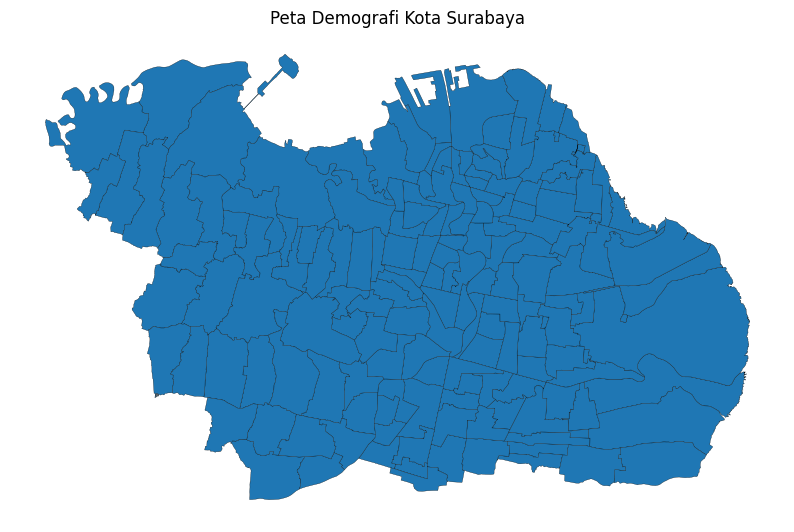

In [8]:
# 3. Analisis Geometri
fig, ax = plt.subplots(1,1,figsize=(10,10))
gdf.plot(ax=ax, edgecolor="k", linewidth=0.2)
ax.set_title("Peta Demografi Kota Surabaya")
ax.axis("off")
plt.show()

In [9]:
# hitung centroid
gdf["centroid"] = gdf.geometry.centroid
display(gdf[["DESA","KECAMATAN","centroid"]].head())

C:\Users\HP ELITEBOOK\AppData\Local\Temp\ipykernel_16876\2028523809.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["centroid"] = gdf.geometry.centroid


,DESA,KECAMATAN,centroid
0,ROMOKALISARI,BENOWO,POINT (112.6398 -7.20502)
1,WONOREJO,TEGALSARI,POINT (112.73174 -7.27113)
2,WONOREJO,RUNGKUT,POINT (112.8148 -7.31131)
3,WONOKUSUMO,SEMAMPIR,POINT (112.75525 -7.21828)
4,WONOKROMO,WONOKROMO,POINT (112.73161 -7.30513)


C:\Users\HP ELITEBOOK\AppData\Local\Temp\ipykernel_16876\3915926144.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.plot(ax=ax, color="red", markersize=5)


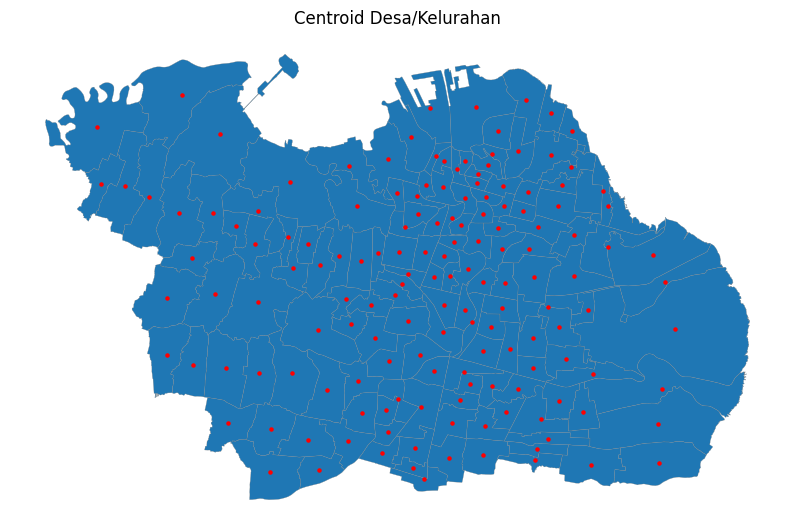

In [10]:
# plot centroid
fig, ax = plt.subplots(1,1,figsize=(10,10))
gdf.plot(ax=ax, edgecolor="gray", linewidth=0.2)
gdf.centroid.plot(ax=ax, color="red", markersize=5)
ax.set_title("Centroid Desa/Kelurahan")
ax.axis("off")
plt.show()


In [11]:
# 4. Analisis Korelasi
corr_cols = ["JUMLAH PENDUDUK","KEPADATAN PENDUDUK","JUMLAH KK","JUMLAH WAJIB KTP","PENSIUN"]
corr_df = gdf[corr_cols].apply(pd.to_numeric, errors="coerce")
corr = corr_df.corr()
print("\nMatriks Korelasi:")
display(corr)


Matriks Korelasi:


,JUMLAH PENDUDUK,KEPADATAN PENDUDUK,JUMLAH KK,JUMLAH WAJIB KTP,PENSIUN
JUMLAH PENDUDUK,1.000000,1.000000,0.996675,0.998573,0.524224
KEPADATAN PENDUDUK,1.000000,1.000000,0.996675,0.998573,0.524224
JUMLAH KK,0.996675,0.996675,1.000000,0.998958,0.538205
JUMLAH WAJIB KTP,0.998573,0.998573,0.998958,1.000000,0.542039
PENSIUN,0.524224,0.524224,0.538205,0.542039,1.000000


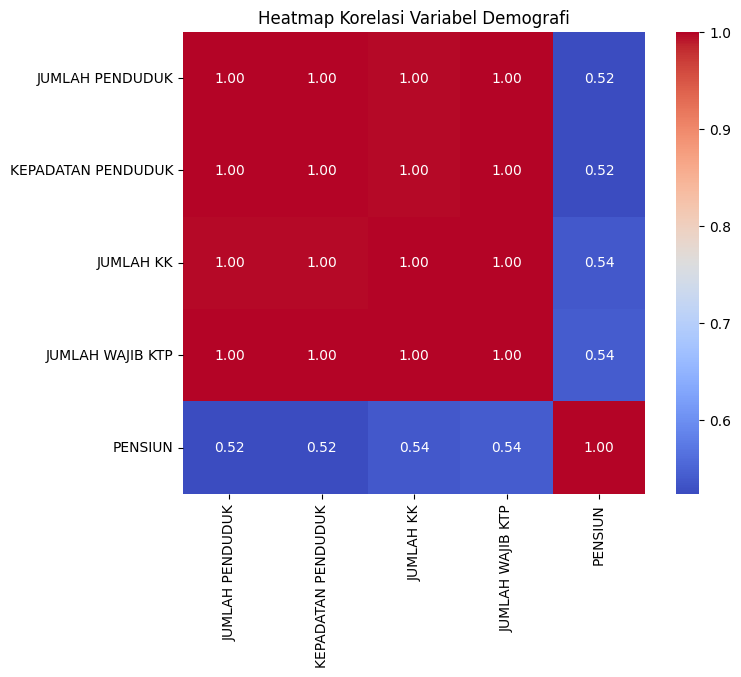

In [12]:

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", square=True, fmt=".2f")
plt.title("Heatmap Korelasi Variabel Demografi")
plt.show()

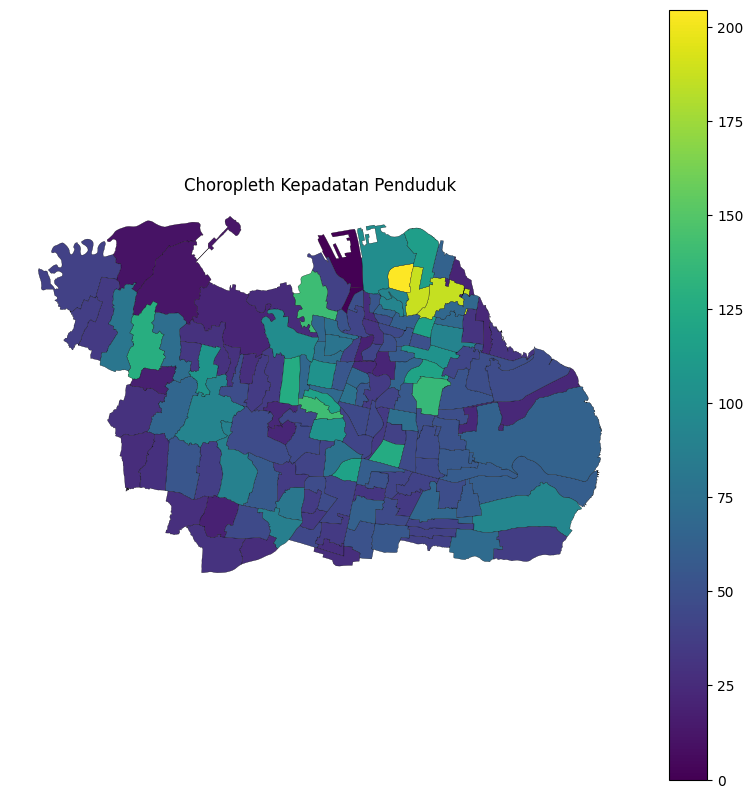

In [13]:
# 5. Distribusi Spasial Kepadatan Penduduk
fig, ax = plt.subplots(1,1,figsize=(10,10))
gdf.plot(column="KEPADATAN PENDUDUK", cmap="viridis", ax=ax, legend=True, edgecolor="black", linewidth=0.2)
ax.set_title("Choropleth Kepadatan Penduduk")
ax.axis("off")
plt.show()


In [26]:
# 6. Peta Tematik Interaktif Folium (tanpa save html)

import folium
from shapely.geometry import shape

# Buat GeoDataFrame khusus untuk folium (hapus centroid agar tidak error JSON)
gdf_map = gdf.drop(columns=["centroid"], errors="ignore")

# Aggregate jumlah penduduk per kecamatan
agg_kec_simple = gdf.groupby("KECAMATAN", as_index=False)[["JUMLAH PENDUDUK"]].sum()

# Buat peta
m = folium.Map(location=[-7.2575, 112.7521], zoom_start=11)

# Choropleth layer
folium.Choropleth(
    geo_data=gdf_map.__geo_interface__,
    name="choropleth",
    data=agg_kec_simple,
    columns=["KECAMATAN","JUMLAH PENDUDUK"],
    key_on="feature.properties.KECAMATAN",
    fill_color="magma",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Jumlah Penduduk per Kecamatan"
).add_to(m)

# Popup marker
for feat in gdf_map.__geo_interface__["features"]:
    try:
        geom = feat["geometry"]
        c = shape(geom).centroid
        props = feat["properties"]
        kec = props.get("KECAMATAN","-")
        desa = props.get("DESA","-")
        jp = props.get("JUMLAH PENDUDUK","-")
        kk = props.get("JUMLAH KK", props.get("JUMLAH_KK","-"))
        luas = props.get("LUAS WILAYAH (KM2)", props.get("LUAS_WILAYAH_KM2","-"))
        popup_html = f"""
        <b>KECAMATAN:</b> {kec}<br>
        <b>DESA:</b> {desa}<br>
        <b>JUMLAH KK:</b> {kk}<br>
        <b>LUAS WILAYAH (KM2):</b> {luas}<br>
        <b>JUMLAH PENDUDUK:</b> {jp}
        """
        folium.Marker(location=[c.y, c.x], popup=popup_html).add_to(m)
    except Exception:
        continue

# Tampilkan peta interaktif langsung di notebook
m
